In [1]:
import numpy as np
import scipy.stats as scs
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

## CENTRAL LIMIT THEOREM 

In [18]:
# instantiate 2 scipy stats distribution objects with their parameters
dist1 = scs.poisson(20)
dist2 = scs.poisson(100)

def plot_weird_distribution(dist1, dist2):
    '''
    Plots bimodal poisson distribution for visualization purposes only
    '''
    x = np.linspace(0, 100, 101)
    # you may need to change this to pmf/pdf depending on which distribution you pick 
    y = 0.25*dist1.pmf(x) + 0.75*dist2.pmf(x)
    fig = plt.figure(figsize = (12, 8))
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_ylabel('Probability Density', size = 'x-large')
    ax.set_title('Not a normal distribution!', size='xx-large')

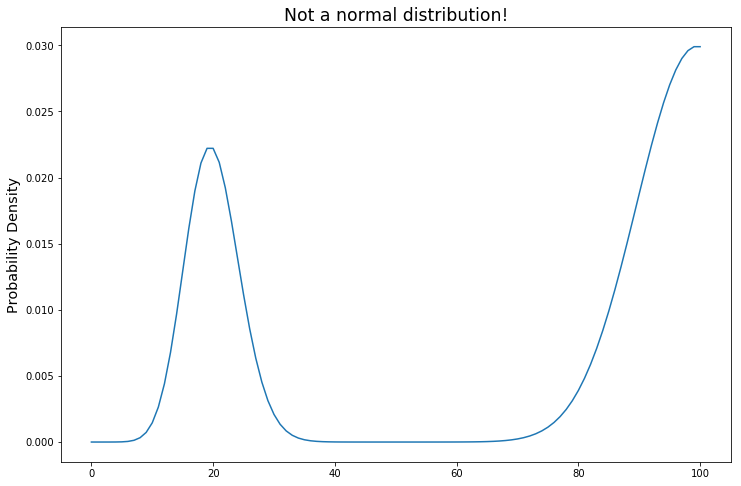

In [19]:
plot_weird_distribution(dist1, dist2)

In [17]:
def sample_weird_distribution(n_samples, dist1, dist2):
    '''
    returns n_samples from weird poisson distibution
    '''
    return np.hstack((dist1.rvs(int(0.25*n_samples)), dist2.rvs(int(0.75*n_samples))))

##### Compute the expected mean of your distribution. It should be
```
E(X) = 0.25*E(X~dist1) + 0.75*E(X~dist2)
```     

set it equal to a variable called `exp_mean`. You will use this in a minute!

In [21]:
# math
exp_mean = 80


#### Check to see if a sample comes close. It won't be exact!

In [35]:
x = sample_weird_distribution(100, dist1, dist2)
x.mean()

80.75

Now, let's sample your odd distribution many times 

In [36]:
# performs many draws from a given sample size to test central limit theorem 
def many_sample_means(n_samples, n_draws = 1000):
    '''
    returns an array of n_draws means from the weird distribution
    '''
    means_list = []
    for _ in range(n_draws):
        x = sample_weird_distribution(n_samples, dist1, dist2)
        means_list.append(x.mean())
    return np.array(means_list)

In [37]:
# try this with grid_size_const argument both ways 
def plot_draws(sample_sizes, grid_size_const = True):
    '''
    plots distributions
    '''
    # generic subplot arrangement - won't always be pretty
    n_cols = math.ceil(np.sqrt(len(sample_sizes)))
    n_rows = math.ceil(len(sample_sizes)/ n_cols)
    
    # instantiate figure:
    fig, axes = plt.subplots(n_rows, n_cols, sharex = grid_size_const, sharey=grid_size_const, figsize = (10,7))
    axes = axes.flatten()
    # add subplots
    for i, size in enumerate(sample_sizes):
        # get means
        means = many_sample_means(size)
        # plot histogram        
        axes[i].hist(means, bins = 30, normed = True, label = 'N = {}'.format(size))
        # draw a vertical line for the mean
        axes[i].vlines(exp_mean, 0, 6)
        axes[i].legend(loc = 'upper left')
    fig.suptitle('Distribution of sample means', size = 'xx-large')


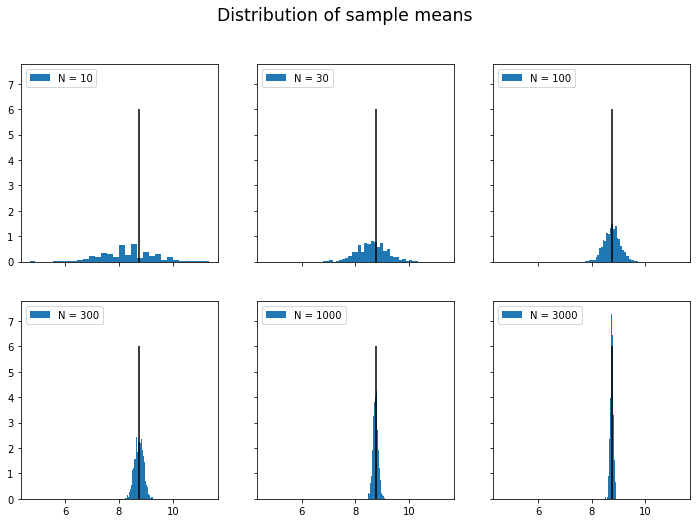

In [24]:
# put in your own list of values here and try it out!
plot_draws([10, 30, 100, 300, 1000, 3000])

## HYPOTHESIS TESTING EXAMPLES 

In [40]:
# read in student data
data = pd.read_csv('/Users/jacobshomer/Downloads/hypothesis_testing_data - morning_data.csv - hypothesis_testing_data - morning_data.csv.csv', skiprows = 1, names = ['name', 'gender', 'height', 'eye_color', 'birth_month'])

In [41]:
# get rid of NaNs incase someone didn't fill in their info
data.dropna(inplace = True)

In [42]:
# sanity check that data types are correct, etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 5 columns):
name           21 non-null object
gender         21 non-null object
height         21 non-null float64
eye_color      21 non-null object
birth_month    21 non-null object
dtypes: float64(1), object(4)
memory usage: 1008.0+ bytes


In [43]:
# clean up text columns
data.gender = data.gender.apply(lambda x: x.replace(" ", "").upper())
data.eye_color = data.eye_color.apply(lambda x: x.replace(" ", "").lower())
data.birth_month = data.birth_month.apply(lambda x: x.replace(" ", "").lower())

### EXAMPLE: COMPARING HEIGHTS BY GENDER

Let's compare the height of the women in the class to the height of the men. 

First, state the null (H0) and the alternative (H1) hypotheses
Next, let's choose a level of significance (alpha)
Finally, choose the correct statistical test, and then check in as a class before you find the test statistic

In [46]:
# collect heights from class
womens_heights = data.query('gender == "F"').height.values
mens_heights = data.query('gender == "M"').height.values
type(womens_heights)

numpy.ndarray

get mean, variance, N

In [48]:
# get women's mean, sample var, N
# remember to get the sample variance instead of the population variance (use ddof kwarg)
w_mean = np.mean(womens_heights)

w_var = np.var(womens_heights, ddof=1)

w_N = len(womens_heights)

In [69]:
# get men's mean, sample var, N
# remember to get the sample variance instead of the population variance (use ddof kwarg)
m_mean = np.mean(mens_heights)

m_var = np.var(mens_heights, ddof=1)

m_N = len(mens_heights)

m_mean, m_var, m_N

(69.53125, 12.982291666666667, 16)

In [70]:
# compute test statistic by hand 
test_stat = (m_mean - w_mean)/ np.sqrt(w_var/(w_N)+m_var/(m_N))

# lookup p-value - hint, use cdf
p_val = 1-scs.norm.cdf(test_stat)

print(test_stat, p_val)

1.98702240785 0.023459956866


Now, check the answer with scipy.stats

In [72]:
scs.ttest_ind(mens_heights, womens_heights, equal_var=False)

Ttest_indResult(statistic=1.9870224078533161, pvalue=0.096162393220164635)

### EXAMPLE: COMPARE PROPORTION OF BLUE EYES TO NATIONAL AVERAGE

Recent statistics indicate about 17% of Americans have blue/gray/green eyes. Let's see how our class sample compares to the wider population

First, state the null (H0) and the alternative (H1) hypotheses
Next, let's choose a level of significance (alpha)
Finally, choose the correct statistical test, and then check in as a class before you find the test statistic

In [73]:
# assign population proportion
p = 0.17

# get total sample size
n = data.eye_color.values.shape[0]

# compute eye color proportion 
eyes_sample = (data.eye_color.values == 'blue').astype('int')


In [74]:
# check how many pairs of blue eyes
eyes_sample.sum()

10

In [84]:
scs.binom_test(eyes_sample.sum(), n, p)

0.0011404434964409414

### Multiple Comparisons

Let's compare heights by birth month! I'm going to choose a significance level of 0.05, and see if I find any significant results.

In [85]:
# get the average height and 
heights_by_month = data.groupby('birth_month')['height'].agg(['mean', 'count'])

In [86]:
# filter out months with only one person since you can't have variance of just one sample...
heights_by_month.query('count >= 2').head(12)

,mean,count
birth_month,,
april,68.666667,3
january,68.625000,4
july,64.000000,2
may,71.000000,3
november,68.000000,3
october,70.333333,3


In [88]:
# cherry pick best t_test 
min_height_ary = data.query('birth_month == "july"').height.values

max_height_ary = data.query('birth_month == "may"').height.values

scs.ttest_ind(min_height_ary, max_height_ary)

Ttest_indResult(statistic=-1.3281566172707193, pvalue=0.27612969548878086)

Is this result significant? Why or why not?